In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "f7RkCP05ax6m5R75e7NEROblP"
CONSUMER_SECRET = "zXiRP1rQBy9d2bDuAFpwD98zzkmslML769iY0jhLDjpH88dmfM"
OAUTH_TOKEN = "994129208233295872-BdzZ761Mi4hxjWK2kRno4Fx3mlOd0wH"
OAUTH_TOKEN_SECRET = "E3HfihiBifLdCWOaoudr5hbJUdduovpTIFjRyAqC9nGs3"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='realDonaldTrump',count=100, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    tweetsL.append(tweet)

I Got: 100  tweets


In [ ]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='realDonaldTrump',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        tweetsL.append(tweet)
# Number of tweets the user has made
print("I got :", len(tweetsL), " in total!!!")

I Got: 100  tweets more... Last ID: 1270071794628726783
I Got: 100  tweets more... Last ID: 1269071962183208959
I Got: 100  tweets more... Last ID: 1268875438857781247
I Got: 100  tweets more... Last ID: 1268496283649609729
I Got: 100  tweets more... Last ID: 1268122362270056448
I Got: 100  tweets more... Last ID: 1267515702652678143
I Got: 100  tweets more... Last ID: 1266047584038256639
I Got: 99  tweets more... Last ID: 1265255835124539391
I Got: 100  tweets more... Last ID: 1264176529606619135
I Got: 100  tweets more... Last ID: 1263114522925154306
I Got: 100  tweets more... Last ID: 1262156808497631233
I Got: 100  tweets more... Last ID: 1261302802296561667
I Got: 100  tweets more... Last ID: 1260165413817798655
I Got: 98  tweets more... Last ID: 1259562805327429632
I Got: 100  tweets more... Last ID: 1259215531153993728
I Got: 100  tweets more... Last ID: 1257046941491437568
I Got: 100  tweets more... Last ID: 1256024436513411071
I Got: 100  tweets more... Last ID: 12551330034931

In [ ]:
len(tweetsL)

3228

In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Sun Jun 14 14:23:27 +0000 2020 https://t.co/gjBMFDbUps
Sun Jun 14 14:22:30 +0000 2020 RT @DeptofDefense: First to fight! Happy birthday to the @USArmy. Fighting ‘til the battle is won. Thank you for rolling along for 245 year…
Sun Jun 14 14:22:17 +0000 2020 RT @USArmy: Today, we recognize 245 years of bravery, commitment, skill and answering the call to serve. 

We are America's Army.

#ArmyBda…
Sun Jun 14 13:18:09 +0000 2020 RT @ErrolWebber: America is better for having you as @POTUS, @realDonaldTrump!

#HappyBirthdayTrump https://t.co/Rv1eD10sqA
Sun Jun 14 13:15:52 +0000 2020 RT @mikandynothem: Happy Birthday Mr. President!
America is blessed beyond measure to have you in the White House. You're promoting all tha…
Sun Jun 14 13:15:03 +0000 2020 Thank you Philip! https://t.co/jGspqbtSgL
Sun Jun 14 13:12:04 +0000 2020 Michael Moore: I‘m ‘Begging‘ Dems -- Don‘t Underestimate White Male Trump Supporter‘s ‘Rage,‘ ‘Emotion‘ https://t.co/IktLtIZNgZ via @BreitbartNews Well, he got it right i

In [ ]:
tweetsL[10]['full_text']

'RT @markknoller: Pres Trump and Gen Williams giving more than 500 salutes to members of the Class of 2020, most of the 1,107 grads receivin…'

In [ ]:
tweetsL[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jun 14 14:23:27 +0000 2020',
 'display_text_range': [0, 23],
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'whitehouse.gov/presidential-a…',
    'expanded_url': 'https://www.whitehouse.gov/presidential-actions/proclamation-flag-day-national-flag-week-2020/',
    'indices': [0, 23],
    'url': 'https://t.co/gjBMFDbUps'}],
  'user_mentions': []},
 'favorite_count': 30434,
 'favorited': False,
 'full_text': 'https://t.co/gjBMFDbUps',
 'geo': None,
 'id': 1272172806579662851,
 'id_str': '1272172806579662851',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'und',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 7773,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',

In [ ]:
tweets_df = pd.DataFrame(tweetsL)
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Jun 14 14:23:27 +0000 2020,1272172806579662851,1272172806579662851,https://t.co/gjBMFDbUps,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",None,None,None,None,False,7773,30434,False,False,False,und,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Jun 14 14:22:30 +0000 2020,1272172568670330883,1272172568670330883,RT @DeptofDefense: First to fight! Happy birth...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",None,None,None,None,False,3702,0,False,False,NaN,en,{'created_at': 'Sun Jun 14 10:00:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN
2,Sun Jun 14 14:22:17 +0000 2020,1272172511560634368,1272172511560634368,"RT @USArmy: Today, we recognize 245 years of b...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",None,None,None,None,False,5325,0,False,False,NaN,en,{'created_at': 'Sun Jun 14 13:00:49 +0000 2020...,NaN,NaN,NaN,NaN,NaN
3,Sun Jun 14 13:18:09 +0000 2020,1272156371224539136,1272156371224539136,RT @ErrolWebber: America is better for having ...,False,"[0, 123]","{'hashtags': [{'text': 'HappyBirthdayTrump', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",None,None,None,None,False,8830,0,False,False,False,en,{'created_at': 'Sun Jun 14 13:01:23 +0000 2020...,"{'media': [{'id': 1272151949798866945, 'id_str...",NaN,NaN,NaN,NaN
4,Sun Jun 14 13:15:52 +0000 2020,1272155800090349569,1272155800090349569,RT @mikandynothem: Happy Birthday Mr. Presiden...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 25073877, 'id_str': '25073877', 'name':...",None,None,None,None,False,8971,0,False,False,NaN,en,{'created_at': 'Sun Jun 14 13:02:43 +0000 2020...,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/trumptweets.tsv", sep='\t')

In [ ]:
import pandas as pd
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/trumptweets.tsv", sep='\t')

In [2]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/trumptweets.tsv", sep='\t')

In [3]:
full_tweets_df.head()

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,0,Sun Jun 14 14:23:27 +0000 2020,1272172806579662851,1272172806579662851,https://t.co/gjBMFDbUps,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,7773,30434,False,False,False,und,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jun 14 14:22:30 +0000 2020,1272172568670330883,1272172568670330883,RT @DeptofDefense: First to fight! Happy birth...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,3702,0,False,False,NaN,en,{'created_at': 'Sun Jun 14 10:00:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jun 14 14:22:17 +0000 2020,1272172511560634368,1272172511560634368,"RT @USArmy: Today, we recognize 245 years of b...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,5325,0,False,False,NaN,en,{'created_at': 'Sun Jun 14 13:00:49 +0000 2020...,NaN,NaN,NaN,NaN,NaN
3,3,Sun Jun 14 13:18:09 +0000 2020,1272156371224539136,1272156371224539136,RT @ErrolWebber: America is better for having ...,False,"[0, 123]","{'hashtags': [{'text': 'HappyBirthdayTrump', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,8830,0,False,False,False,en,{'created_at': 'Sun Jun 14 13:01:23 +0000 2020...,"{'media': [{'id': 1272151949798866945, 'id_str...",NaN,NaN,NaN,NaN
4,4,Sun Jun 14 13:15:52 +0000 2020,1272155800090349569,1272155800090349569,RT @mikandynothem: Happy Birthday Mr. Presiden...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 25073877, 'id_str': '25073877', 'name':...",NaN,NaN,NaN,NaN,False,8971,0,False,False,NaN,en,{'created_at': 'Sun Jun 14 13:02:43 +0000 2020...,NaN,NaN,NaN,NaN,NaN


In [4]:
short_tweets = full_tweets_df[['created_at','full_text','retweet_count' ]]

In [5]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [6]:
short_tweets.head()

,date,text,retweet_count
0,Sun Jun 14 14:23:27 +0000 2020,https://t.co/gjBMFDbUps,7773
1,Sun Jun 14 14:22:30 +0000 2020,RT @DeptofDefense: First to fight! Happy birth...,3702
2,Sun Jun 14 14:22:17 +0000 2020,"RT @USArmy: Today, we recognize 245 years of b...",5325
3,Sun Jun 14 13:18:09 +0000 2020,RT @ErrolWebber: America is better for having ...,8830
4,Sun Jun 14 13:15:52 +0000 2020,RT @mikandynothem: Happy Birthday Mr. Presiden...,8971


In [7]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [8]:
short_tweets.dtypes

date             datetime64[ns]
text                     object
retweet_count             int64
dtype: object

In [9]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day
short_tweets.head()

,date,text,retweet_count,year,month,day
0,2020-06-14 14:23:27,https://t.co/gjBMFDbUps,7773,2020,6,14
1,2020-06-14 14:22:30,RT @DeptofDefense: First to fight! Happy birth...,3702,2020,6,14
2,2020-06-14 14:22:17,"RT @USArmy: Today, we recognize 245 years of b...",5325,2020,6,14
3,2020-06-14 13:18:09,RT @ErrolWebber: America is better for having ...,8830,2020,6,14
4,2020-06-14 13:15:52,RT @mikandynothem: Happy Birthday Mr. Presiden...,8971,2020,6,14


In [10]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

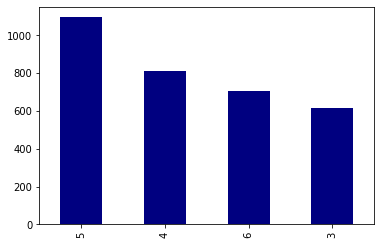

In [11]:
short_tweets['month'].value_counts().plot(kind='bar', color= 'navy')

In [12]:
short_tweets[short_tweets['year']==2020]['text']

0                                                        
1       RT @DeptofDefense: First to fight! Happy birth...
2       RT @USArmy: Today, we recognize 245 years of b...
3       RT @ErrolWebber: America is better for having ...
4       RT @mikandynothem: Happy Birthday Mr. Presiden...
                              ...                        
3223    RT @CDCgov: Older adults &amp; people with a s...
3224    RT @ChadPergram: Trump says SBA will provide c...
3225    RT @JenniferJJacobs: Trump’s new coronavirus t...
3226    RT @NBCNewsNow: JUST IN: US Supreme Court: Tru...
3227    RT @ScottGottliebMD: Governments across the U....
Name: text, Length: 3228, dtype: object

In [13]:
text = short_tweets[short_tweets['year']==2020]['text'].str.cat(sep = ' ').replace("@realDonaldTrump", ' ')

In [14]:
text

'  RT @DeptofDefense: First to fight! Happy birthday to the @USArmy. Fighting ‘til the battle is won. Thank you for rolling along for 245 year… RT @USArmy: Today, we recognize 245 years of bravery, commitment, skill and answering the call to serve. \n\nWe are America\'s Army.\n\n#ArmyBda… RT @ErrolWebber: America is better for having you as @POTUS,  !\n\n#HappyBirthdayTrump   RT @mikandynothem: Happy Birthday Mr. President!\nAmerica is blessed beyond measure to have you in the White House. You\'re promoting all tha… Thank you Philip!   Michael Moore: I‘m ‘Begging‘ Dems -- Don‘t Underestimate White Male Trump Supporter‘s ‘Rage,‘ ‘Emotion‘   RT @markknoller: "You became brothers &amp; sisters pledging allegiance to the same timeless principles, joined together in a common mission: t… RT @markknoller: Pres begins Commencement Address to graduating cadets, “We are here to celebrate your achievements, and great achievements… RT @markknoller: Pres escorted on stage and salutes as Star Spangl

In [15]:
import nltk

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stop_words = nltk.corpus.stopwords.words('english')

In [18]:
text = text.lower()

In [19]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
for word in stop_words:
    text = text.replace(' '+word + ' ', " ")

In [21]:
text[0:1200]

'  rt @deptofdefense: first fight! happy birthday @usarmy. fighting ‘til battle won. thank rolling along 245 year… rt @usarmy: today, recognize 245 years bravery, commitment, skill answering call serve. \n\nwe america\'s army.\n\n#armybda… rt @errolwebber: america better @potus,  !\n\n#happybirthdaytrump   rt @mikandynothem: happy birthday mr. president!\namerica blessed beyond measure white house. promoting tha… thank philip!   michael moore: i‘m ‘begging‘ dems -- don‘t underestimate white male trump supporter‘s ‘rage,‘ ‘emotion‘   rt @markknoller: "you became brothers &amp; sisters pledging allegiance timeless principles, joined together common mission: t… rt @markknoller: pres begins commencement address graduating cadets, “we celebrate achievements, great achievements… rt @markknoller: pres escorted stage salutes star spangled banner played.   rt @markknoller: pres trump gen williams giving 500 salutes members class 2020, 1,107 grads receivin… rt @goarmywestpoint: flyover + hat tos

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline  

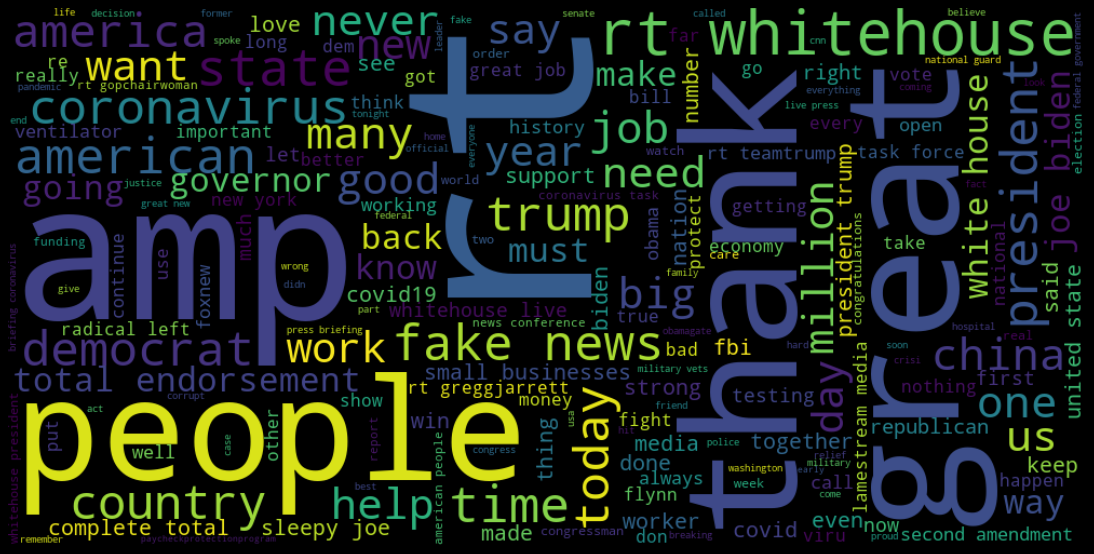

In [23]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 1000,
    height = 500,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
text = text.replace("amp", " ").replace("rt", " ").replace("&", " ").replace(";", " ")

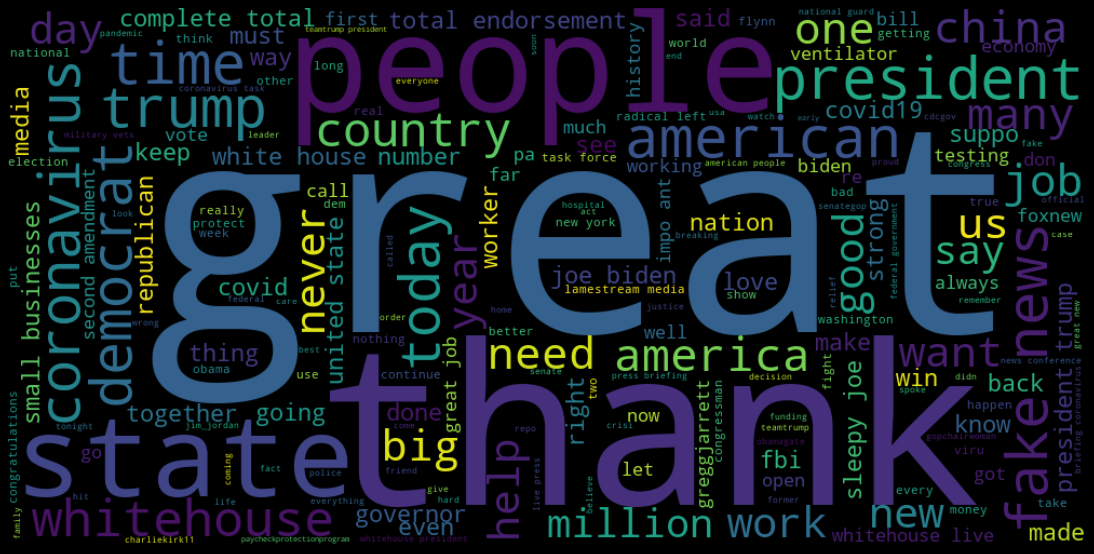

In [25]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 1000,
    height = 500,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
from collections import Counter

In [27]:
split_it = str(text).split() 
  
 
Counter = Counter(split_it) 
  

most_occur = Counter.most_common(16) 
  
print(most_occur) 

[('great', 359), ('president', 247), ('thank', 214), ('people', 190), (':', 184), ('@whitehouse:', 169), ('new', 146), ('trump', 140), ('get', 139), ('coronavirus', 137), ('american', 134), ('news', 133), ('fake', 131), ('joe', 117), ('pa', 114), ('big', 103)]


In [28]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 3.4MB/s 


In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [32]:
analyser = SentimentIntensityAnalyzer()

In [33]:
df= short_tweets
df

,date,text,retweet_count,year,month,day
0,2020-06-14 14:23:27,,7773,2020,6,14
1,2020-06-14 14:22:30,RT @DeptofDefense: First to fight! Happy birth...,3702,2020,6,14
2,2020-06-14 14:22:17,"RT @USArmy: Today, we recognize 245 years of b...",5325,2020,6,14
3,2020-06-14 13:18:09,RT @ErrolWebber: America is better for having ...,8830,2020,6,14
4,2020-06-14 13:15:52,RT @mikandynothem: Happy Birthday Mr. Presiden...,8971,2020,6,14
...,...,...,...,...,...,...
3223,2020-03-12 13:46:53,RT @CDCgov: Older adults &amp; people with a s...,6659,2020,3,12
3224,2020-03-12 13:43:41,RT @ChadPergram: Trump says SBA will provide c...,3151,2020,3,12
3225,2020-03-12 13:40:37,RT @JenniferJJacobs: Trump’s new coronavirus t...,3170,2020,3,12
3226,2020-03-12 13:35:55,RT @NBCNewsNow: JUST IN: US Supreme Court: Tru...,5900,2020,3,12


In [34]:
df['sentText'] = df['text'].apply(lambda x : analyser.polarity_scores(x)['compound'])

In [35]:
df['sentText'] = df['text'].apply(lambda x : (analyser.polarity_scores(x)['compound']) if type(x) ==str  else 0)

In [36]:
df.head(5)

,date,text,retweet_count,year,month,day,sentText
0,2020-06-14 14:23:27,,7773,2020,6,14,0.0000
1,2020-06-14 14:22:30,RT @DeptofDefense: First to fight! Happy birth...,3702,2020,6,14,0.5411
2,2020-06-14 14:22:17,"RT @USArmy: Today, we recognize 245 years of b...",5325,2020,6,14,0.7003
3,2020-06-14 13:18:09,RT @ErrolWebber: America is better for having ...,8830,2020,6,14,0.4926
4,2020-06-14 13:15:52,RT @mikandynothem: Happy Birthday Mr. Presiden...,8971,2020,6,14,0.8858


In [37]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [38]:
df.set_index('date' , inplace=True)

In [39]:
df.head()

,text,retweet_count,year,month,day,sentText
date,,,,,,
2020-06-14 14:23:27,,7773,2020,6,14,0.0000
2020-06-14 14:22:30,RT @DeptofDefense: First to fight! Happy birth...,3702,2020,6,14,0.5411
2020-06-14 14:22:17,"RT @USArmy: Today, we recognize 245 years of b...",5325,2020,6,14,0.7003
2020-06-14 13:18:09,RT @ErrolWebber: America is better for having ...,8830,2020,6,14,0.4926
2020-06-14 13:15:52,RT @mikandynothem: Happy Birthday Mr. Presiden...,8971,2020,6,14,0.8858


In [40]:
score = analyser.polarity_scores(text)

In [41]:
score

{'compound': 1.0, 'neg': 0.137, 'neu': 0.63, 'pos': 0.233}

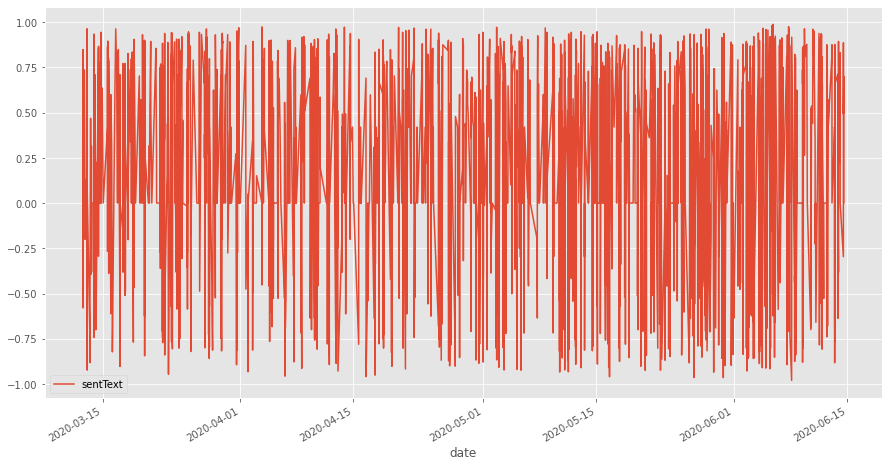

In [50]:
df['2020'].plot(y='sentText', figsize= (15,8))

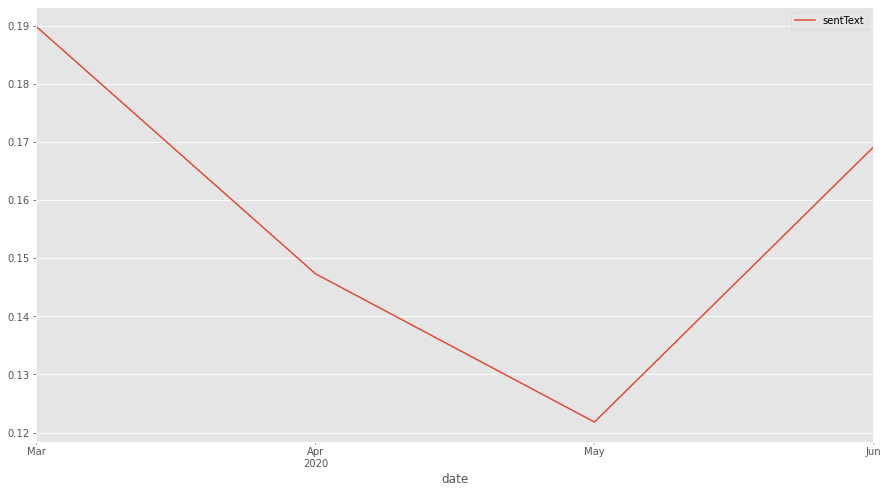

In [51]:
df.resample('M').mean().plot(y='sentText', figsize=(15, 8))

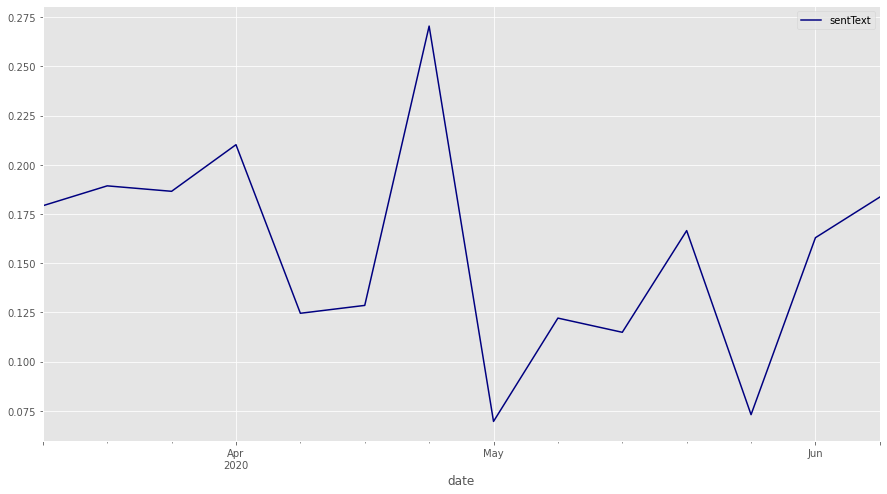

In [52]:
df.resample('W').mean().plot(y='sentText', figsize=(15, 8), color= 'navy')

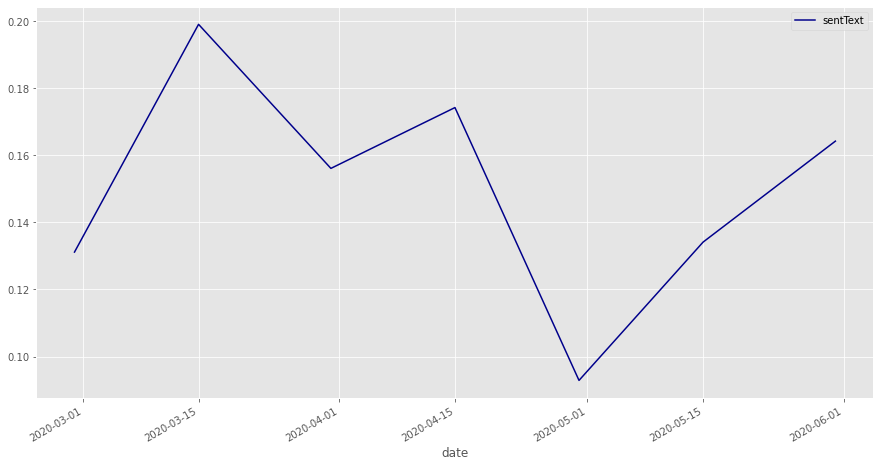

In [53]:
df.resample('SM').mean().plot(y='sentText', figsize=(15, 8), color= 'darkblue')

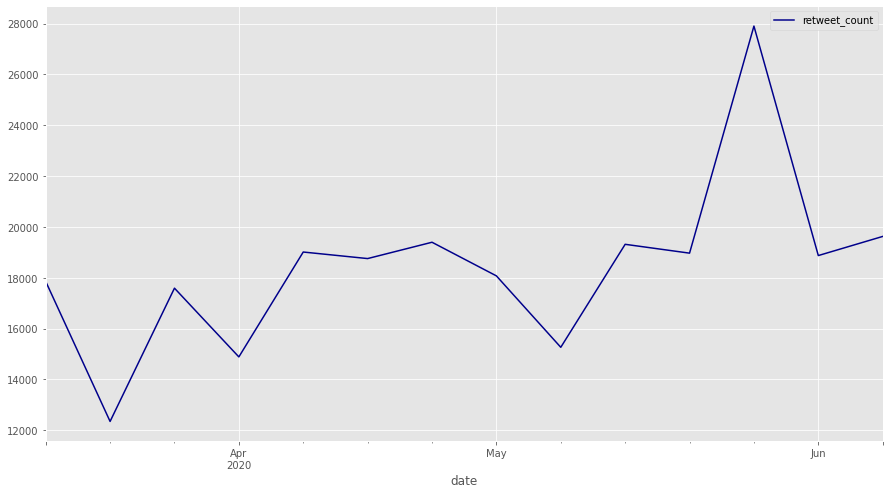

In [54]:
df.resample('W').mean().plot(y='retweet_count', figsize=(15, 8), color= 'darkblue')

In [47]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

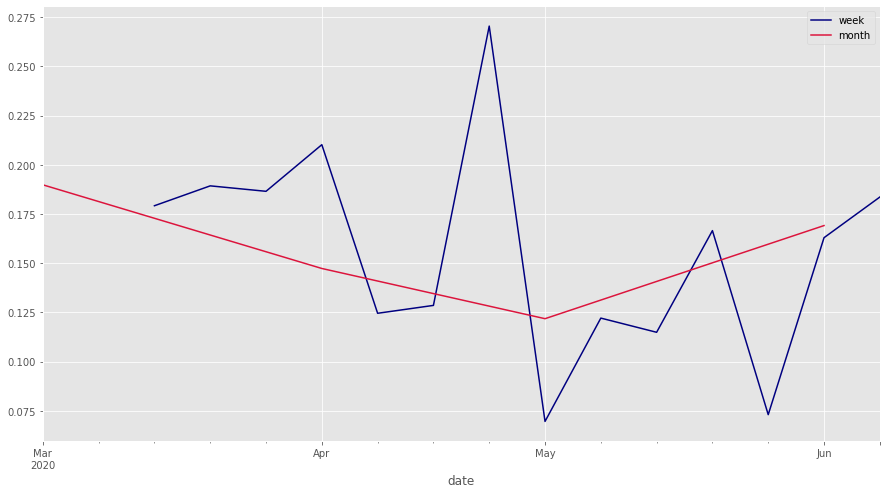

In [48]:
ax = df.resample('W').mean().plot(y='sentText', figsize=(15, 8), color='navy', label= 'week')
df.resample('M').mean().plot(y='sentText', figsize=(15, 8), ax = ax, color ='crimson', label= 'month')



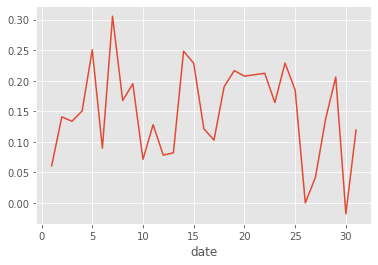

In [49]:
df.groupby(by=df.index.day)['sentText'].mean().plot()